# PiML Toolbox: High-code Demo for BikeSharing Data

This example notebook demonstrates how to use PiML with its high-code APIs for developing machine learning models for the BikeSharing data from UCI repository, which consists of 17,389 samples of hourly counts of rental bikes in Capital bikeshare system; see details [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset). 

The response `cnt` (hourly bike rental counts) is continuous and it is a regression problem.

# Install PiML Toolbox

1. Run `!pip install piml` to install the latest version of PiML
2. In Google Colab, we need restart the runtime in order to use newly installed version

In [1]:
!pip install piml "pandas<=2.0" "numpy<1.24" "xgboost<1.7.3" "pygam<0.9.0"

In [3]:
from piml import Experiment
exp = Experiment()

# Load and Prepare Data

In [5]:
# Choose BikeSharing
exp.data_loader(data='BikeSharing')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,16.0
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,40.0
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,32.0
3,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,13.0
4,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,119.0
17375,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,89.0
17376,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,90.0
17377,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,61.0


In [6]:
# Exclude these features one-by-one: "season", "workingday", "atemp" (highly correlated with others)
exp.data_summary(feature_exclude=["season", "workingday", "atemp"])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='Data Shape:(17379, 13)')

In [7]:
# Prepare dataset by setting target, task type and train-test split
exp.data_prepare(target='cnt', task_type='Regression', test_ratio=0.2, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,0,1
0,Excluded columns,"[season, workingday, atemp]"
1,Target variable,cnt
2,Sample weight,None
3,Task type,Regression
4,Split method,Random
5,Test ratio,0.2
6,Random state,0


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

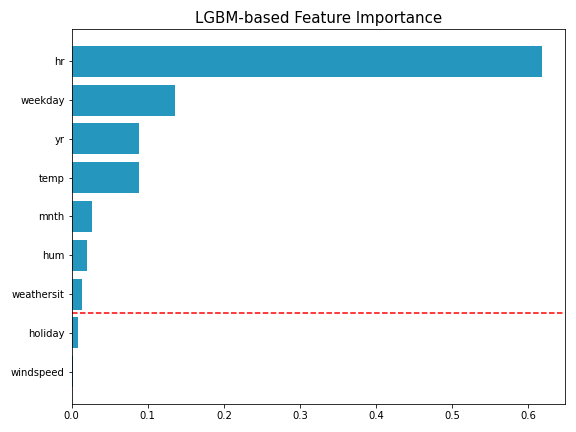

In [8]:
# Optional: select features by LightGBM feature importance 
exp.feature_select(threshold=0.98, method="pfi")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

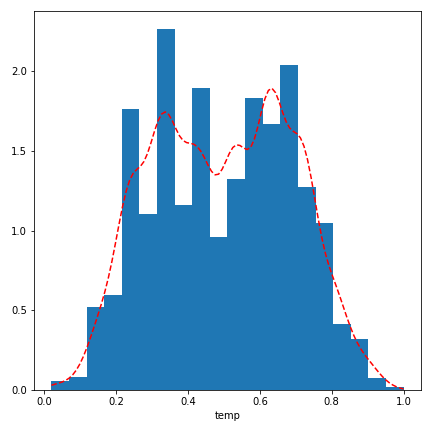

In [9]:
# Exploratory data analysis, check distribution and correlation
exp.eda(show='univariate', uni_feature='temp')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

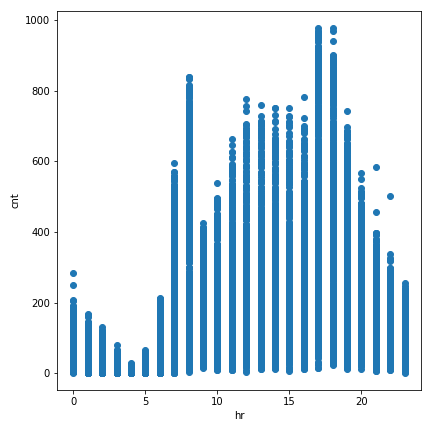

In [10]:
exp.eda(show='bivariate', bi_features=['hr', 'cnt'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

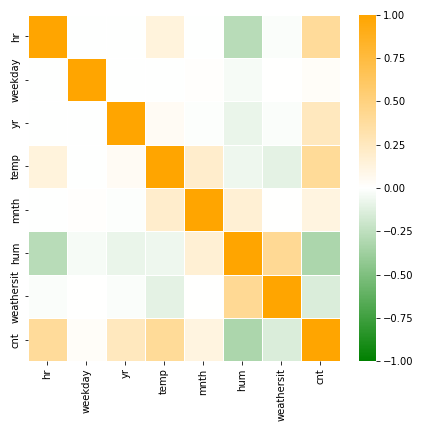

In [11]:
exp.eda(show='multivariate', multi_type='correlation_heatmap')

# Train intepretable models

In [12]:
## ReLU-DNN: ReLU Deep Neural Networks with L1-Regularization
from piml.models import ReluDNNRegressor

clf1 = ReluDNNRegressor(hidden_layer_sizes=(40, 40), l1_reg=1e-05,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf1, name='ReLU-DNN')
exp.model_diagnose(model="ReLU-DNN", show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value="<p class='notification info'>Register ReLU-DNN Done</p>")

,MSE,MAE,R2
,,,
Train,0.0043,0.0446,0.8750
Test,0.0050,0.0477,0.8570
Gap,0.0007,0.0031,-0.0180


In [13]:
## GAMI-Net: GAM-Neural Networks with Structured Interactions
from piml.models import GAMINetRegressor

clf2 = GAMINetRegressor(interact_num=10, loss_threshold=0.01,  
                        subnet_size_main_effect=[20], 
                        subnet_size_interaction=[20,20])
exp.model_train(model=clf2, name='GAMI-Net')
exp.model_diagnose(model="GAMI-Net", show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value="<p class='notification info'>Register GAMI-Net Done</p>")

,MSE,MAE,R2
,,,
Train,0.0036,0.0402,0.8970
Test,0.0039,0.0430,0.8890
Gap,0.0003,0.0027,-0.0080


In [14]:
## EBM: Explainable Boosting Machine from MS Research
from piml.models import ExplainableBoostingRegressor

clf3 = ExplainableBoostingRegressor(interactions=10, random_state=0)
exp.model_train(model=clf3, name='EBM')
exp.model_diagnose(model="EBM", show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value="<p class='notification info'>Register EBM Done</p>")

,MSE,MAE,R2
,,,
Train,0.0064,0.0554,0.8149
Test,0.0069,0.0573,0.8039
Gap,0.0005,0.0019,-0.0110


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

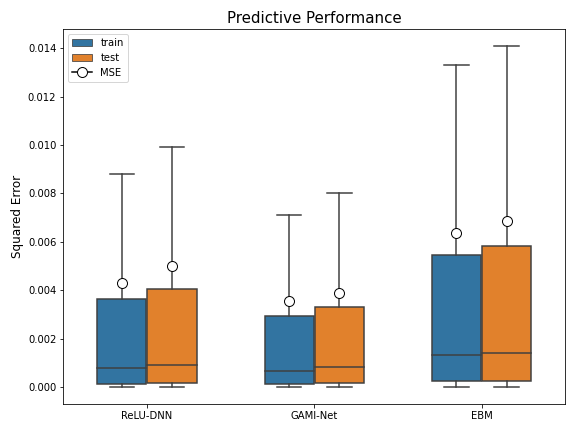

In [15]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='accuracy_plot', metric="MSE")

# Explainability and Interpretability

## Post-hoc Explainability: Global and Local Methods

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

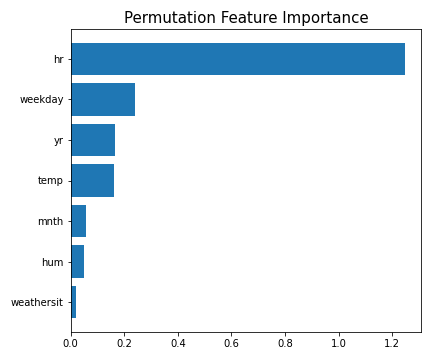

In [16]:
exp.model_explain(model='GAMI-Net', show='pfi', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

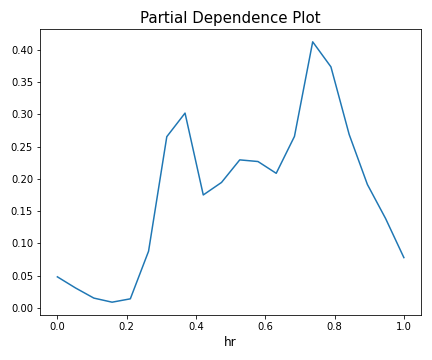

In [17]:
exp.model_explain(model='GAMI-Net', show='pdp', uni_feature='hr', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

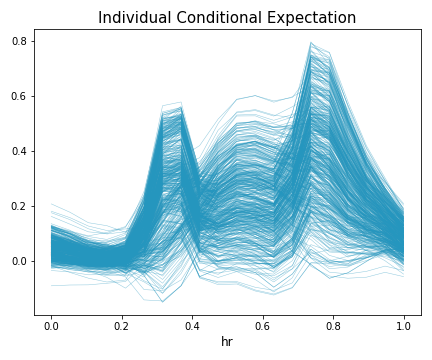

In [18]:
exp.model_explain(model='GAMI-Net', show='ice', uni_feature="hr", figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

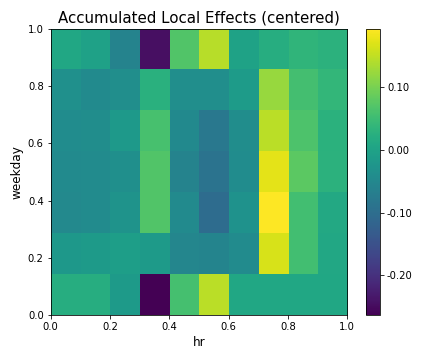

In [19]:
exp.model_explain(model='GAMI-Net', show='ale', bi_features=['hr', 'weekday'], figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

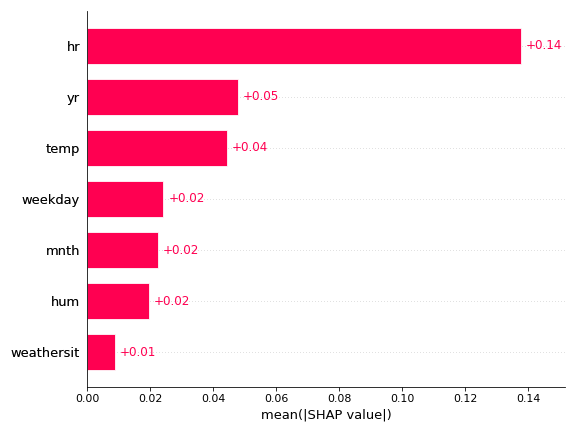

In [20]:
exp.model_explain(model='GAMI-Net', show='shap_fi', sample_size=20)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

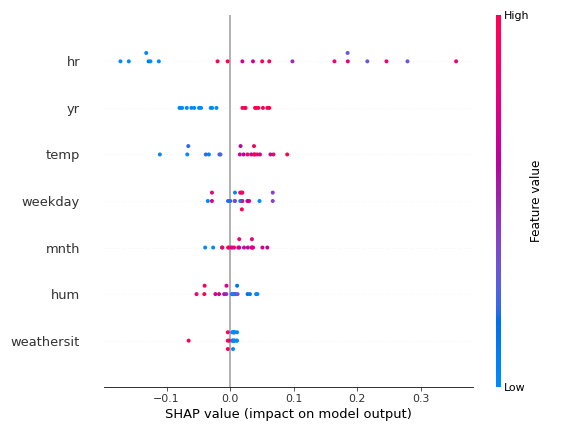

In [21]:
exp.model_explain(model='GAMI-Net', show='shap_summary', sample_size=20)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

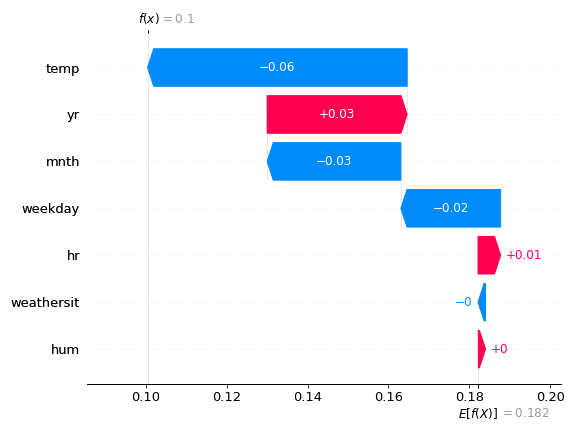

In [22]:
exp.model_explain(model='GAMI-Net', show='shap_waterfall', sample_id=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

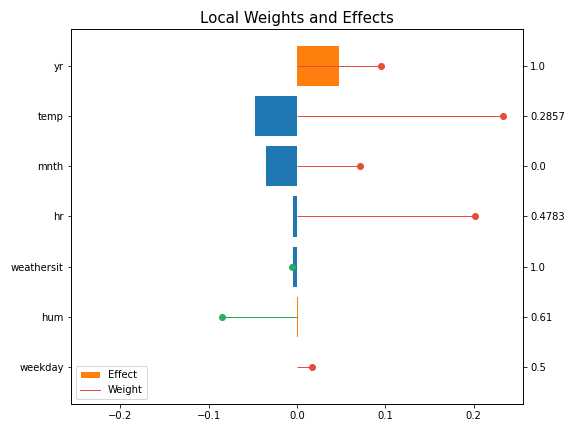

In [23]:
exp.model_explain(model='GAMI-Net', show='lime', sample_id=0)

## Inherent Interpretability: Global and Local Methods
 


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

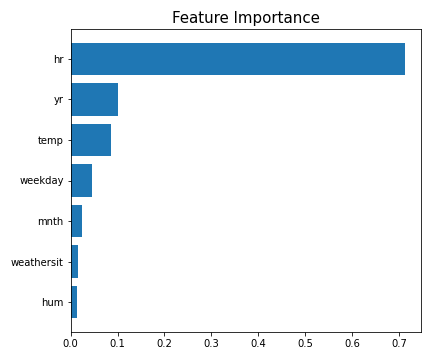

In [24]:
exp.model_interpret(model='GAMI-Net', show='global_fi', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

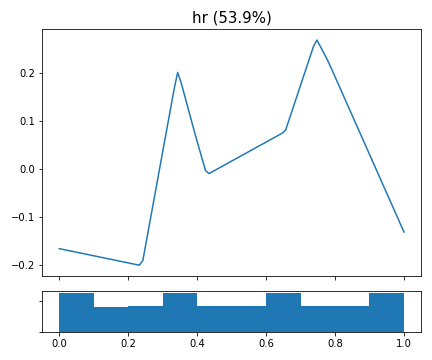

In [25]:
exp.model_interpret(model='GAMI-Net', show='global_effect_plot', uni_feature='hr', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

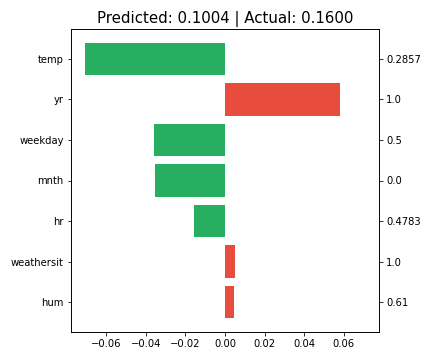

In [26]:
exp.model_interpret(model='GAMI-Net', show='local_fi', sample_id=0, figsize=(6,5))

# Model Diagnostics and Outcome Testing

In [27]:
exp.model_diagnose(model='GAMI-Net', show='accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,MSE,MAE,R2
,,,
Train,0.0036,0.0402,0.8970
Test,0.0039,0.0430,0.8890
Gap,0.0003,0.0027,-0.0080


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

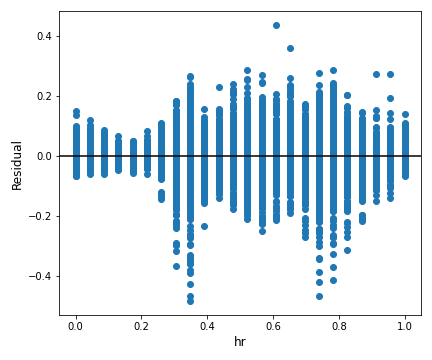

In [28]:
exp.model_diagnose(model='GAMI-Net', show='accuracy_residual', target_feature='hr', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

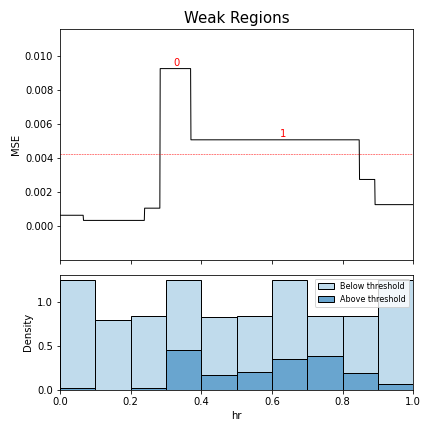

In [29]:
exp.model_diagnose(model='GAMI-Net', show='weakspot', slice_features=['hr'], 
                   slice_method='tree', threshold=1.2, min_sample=20, figsize=(6, 6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

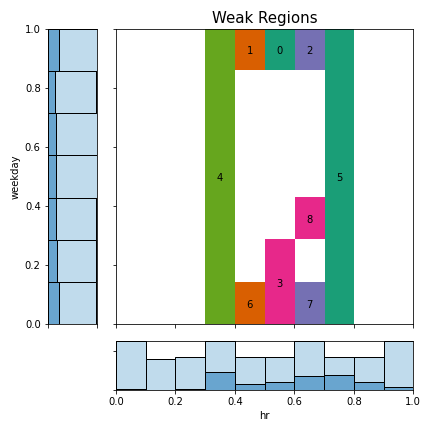

In [30]:
exp.model_diagnose(model='GAMI-Net', show='weakspot', slice_features=['hr', 'weekday'], 
                   slice_method='histogram', threshold=1.2, min_sample=20, figsize=(6, 6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

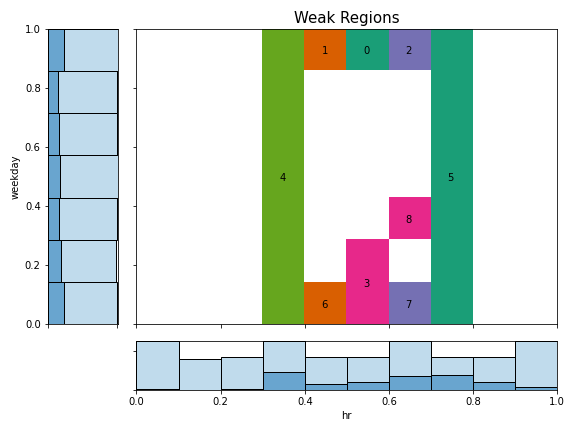

In [31]:
exp.model_diagnose(model='GAMI-Net', show='weakspot', slice_features=['hr', 'weekday'], return_data=True,
                   slice_method='histogram', threshold=1.2, min_sample=20)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

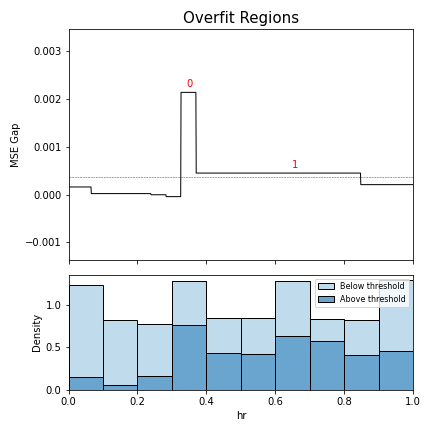

In [32]:
exp.model_diagnose(model='GAMI-Net', show='overfit', slice_features=['hr'], 
                   slice_method='tree', threshold=1.1, min_sample=20, figsize=(6, 6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

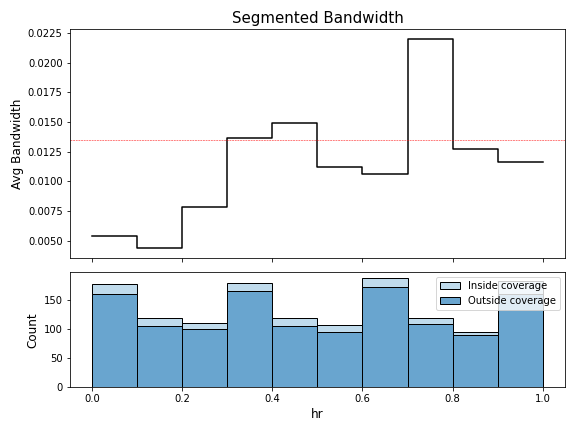

In [33]:
exp.model_diagnose(model='GAMI-Net', show='reliability_marginal', alpha=0.9, 
                   target_feature='hr', threshold=1.2, bins=10)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

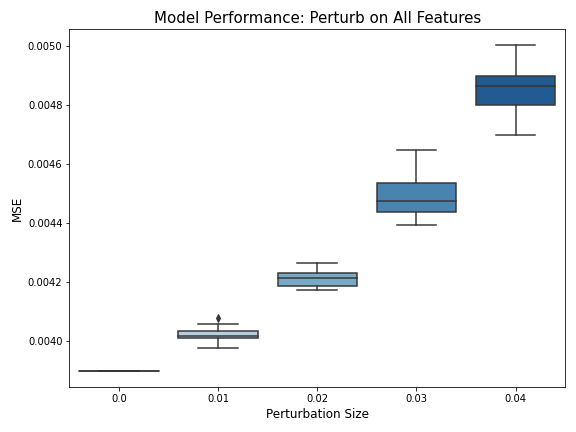

In [34]:
exp.model_diagnose(model='GAMI-Net', show='robustness_perf', perturb_features='All Features',
                   perturb_size=0.01, alpha=0.2)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

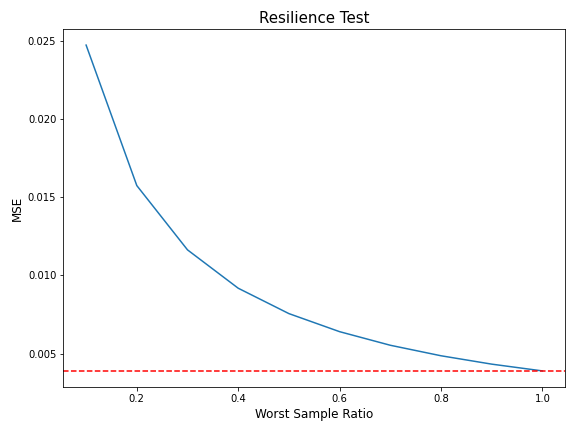

In [35]:
exp.model_diagnose(model='GAMI-Net', show='resilience_perf', immu_feature=None, 
                   target_feature='hr', alpha=0.2)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

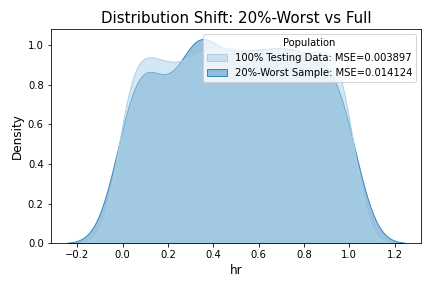

In [36]:
exp.model_diagnose(model='GAMI-Net', show='resilience_shift_density', immu_feature='hr', 
                   target_feature='hr', alpha=0.2, figsize=(6,4))

# Model Comparison and Benchmarking

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

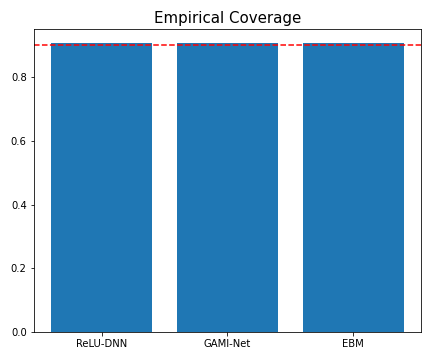

In [37]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='reliability_coverage', 
                  alpha=0.1, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

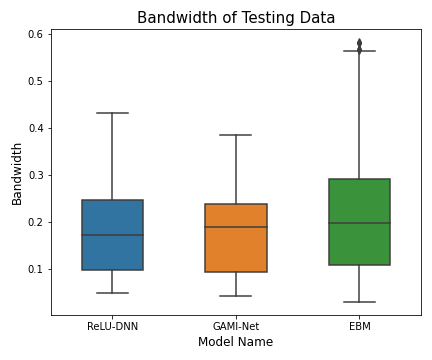

In [38]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='reliability_bandwidth', 
                  alpha=0.1, figsize=(6,5))

In [39]:
exp.model_diagnose(model='ReLU-DNN', show='reliability_table', alpha=0.1, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Empirical Coverage,Average Bandwidth
0,0.905036,0.180133


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

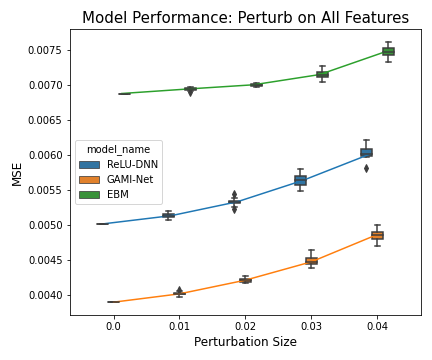

In [40]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='robustness_perf', 
                  perturb_features='All Features', perturb_size=0.01, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

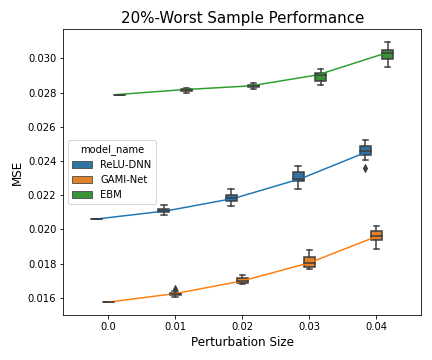

In [41]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='robustness_perf_worst', 
                  perturb_features='All Features', perturb_size=0.01, alpha=0.2, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

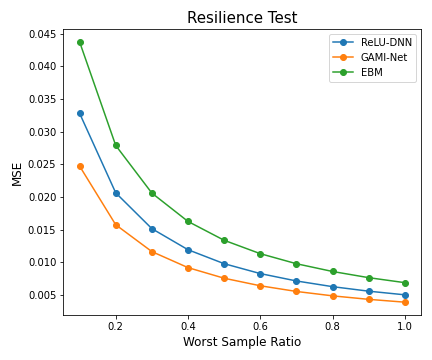

In [42]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='resilience_perf', 
                  immu_feature=None, figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

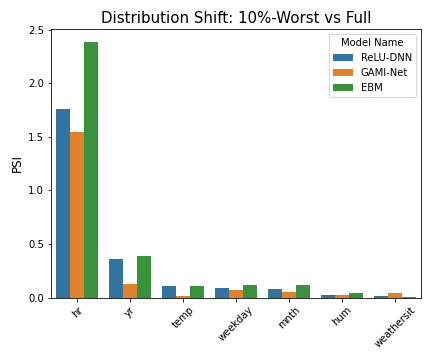

In [43]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='resilience_distance', 
                  immu_feature=None, figsize=(6,5))